In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('train.csv')

In [12]:
new_df = df.sample(30000,random_state=2)

In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
new_df.duplicated().sum()

0

is_duplicate
0    19013
1    10987
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

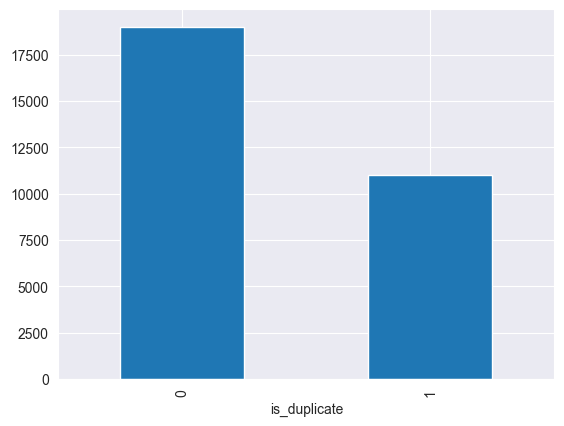

In [14]:
print(new_df['is_duplicate'].value_counts())
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [15]:
qid = pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of unique question',np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Numboer of question getting repeat',x[x].shape[0])

Number of unique question 55299
Numboer of question getting repeat 3480


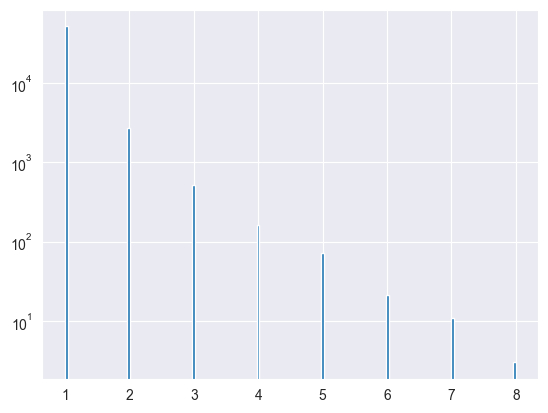

In [16]:
plt.hist(qid.value_counts(),bins=160)
plt.yscale('log')
plt.show()

# Feature Engineering

In [17]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [18]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57


In [19]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row : len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row : len(row.split(" ")))

In [20]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15


In [21]:
def common_words(row):
    w1 = set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words,axis=1)

In [24]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [25]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(),row['question2'].split(" ")))
    return len(w1)+len(w2)

In [26]:
new_df['word_total'] = new_df.apply(total_words,axis=1)

In [27]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [28]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30


minimum charecter 2
maximum charecter 391
average charecter 59.7133


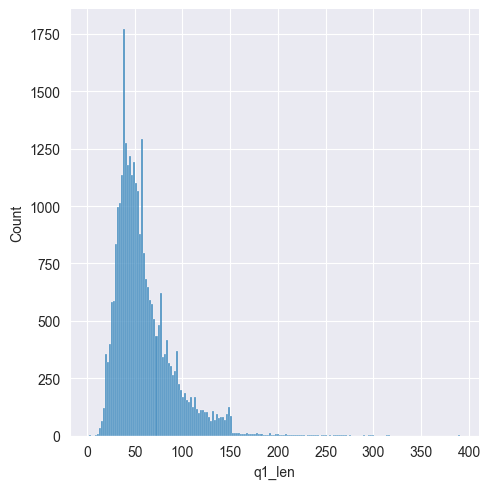

In [30]:
sns.displot(new_df['q1_len'])
print('minimum charecter',new_df['q1_len'].min())
print('maximum charecter',new_df['q1_len'].max())
print('average charecter',new_df['q1_len'].mean())

minimum charecter 6
maximum charecter 1151
average charecter 60.29343333333333


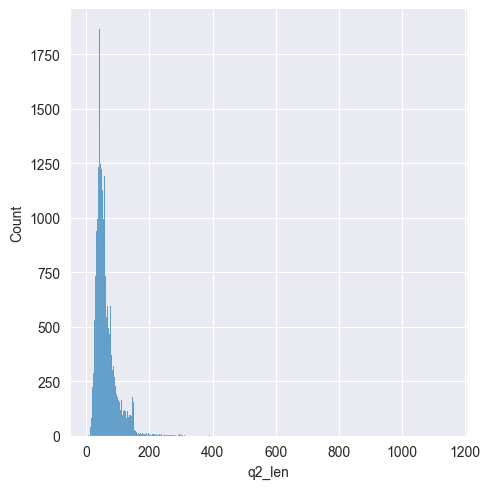

In [31]:

sns.displot(new_df['q2_len'])
print('minimum character', new_df['q2_len'].min())
print('maximum character', new_df['q2_len'].max())
print('average character', new_df['q2_len'].mean())

minimum character 1
maximum character 72
average character 10.969133333333334


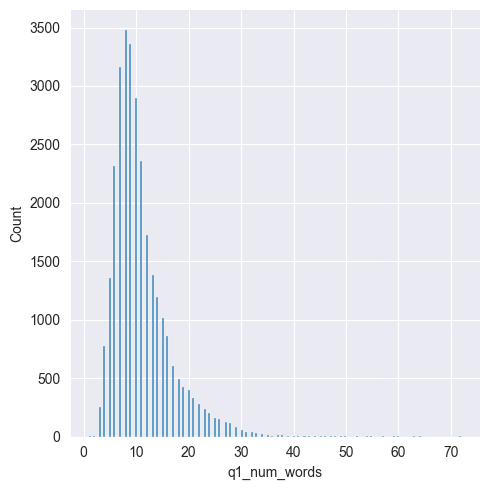

In [32]:
sns.displot(new_df['q1_num_words'])
print('minimum words', new_df['q1_num_words'].min())
print('maximum words', new_df['q1_num_words'].max())
print('average words', new_df['q1_num_words'].mean())

minimum character 1
maximum character 237
average character 11.232133333333334


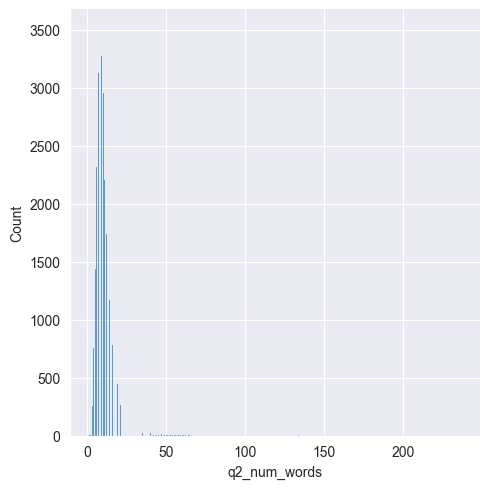

In [33]:
sns.displot(new_df['q2_num_words'])
print('minimum words', new_df['q2_num_words'].min())
print('maximum words', new_df['q2_num_words'].max())
print('average words', new_df['q2_num_words'].mean())

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_15508\1874251089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_15508\1874251089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

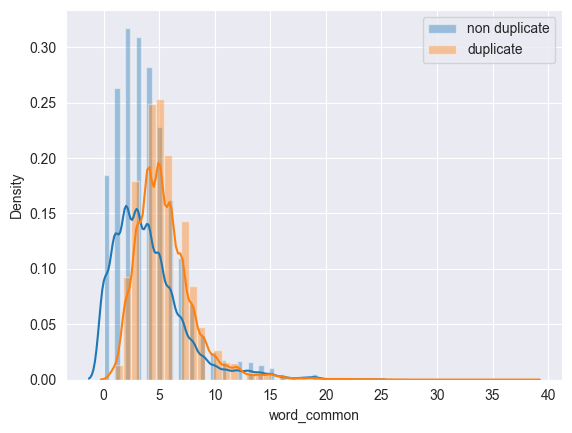

In [36]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_15508\556194975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_15508\556194975.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



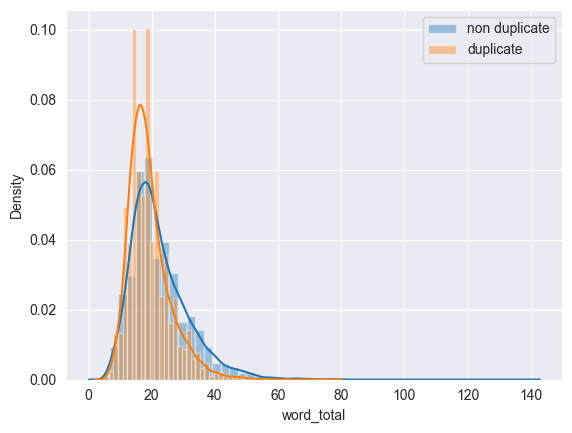

In [37]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_15508\2923683252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_15508\2923683252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

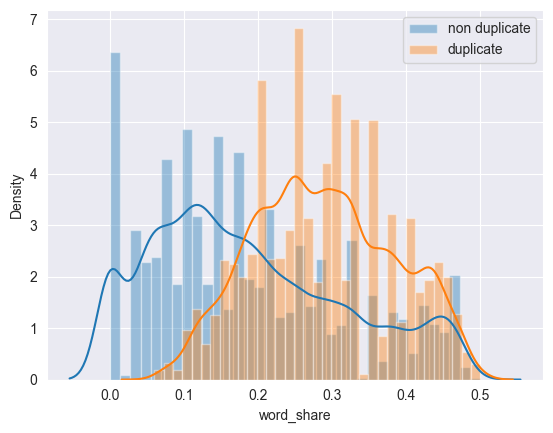

In [38]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [39]:
ques_df = new_df[['question1','question2']]
ques_df.head(2)

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...


In [40]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


## Bag of words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1'])+list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [43]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [45]:
final_df = pd.concat([final_df,temp_df],axis=1)

In [46]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=0)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7718333333333334
